In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import re
import more_itertools 
from typing import Final
import os
import pathlib
import numpy as np
from sklearn.manifold import TSNE

package_path: Final[str]  = pathlib.Path().resolve().parent.parent.resolve()

PATH_DATA: Final[str] = os.path.join(package_path, 'data')
PATH_RAW: Final[str] = os.path.join(PATH_DATA, 'raw')
PATH_INTERMEDIATE: Final[str] = os.path.join(PATH_DATA, 'intermediate')
PATH_PRIMARY: Final[str] = os.path.join(PATH_DATA, 'primary')

In [2]:
df = pd.read_parquet(os.path.join(PATH_INTERMEDIATE, 'juritrack.parquet'))

In [3]:
df.head()

,id_title,title
0,0,- 2023-264 Décision de délégation de signatur...
1,1,Arrêté n°2024-09 portant subdélégation de sig...
2,2,2023-269 Décision de délégation de signature ...
3,3,Arrêté n° 2024-12 portant subdélégation de si...
4,4,2023-270 Décision de délégation de signature ...


In [4]:
df['len'] = df['title'].str.len()
df['wc'] = df['title'].str.findall(r'(\w+)').str.len()

<Axes: >

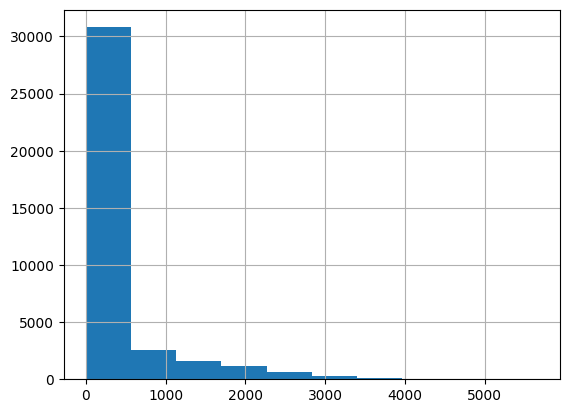

In [5]:
df['len'].hist()

<Axes: >

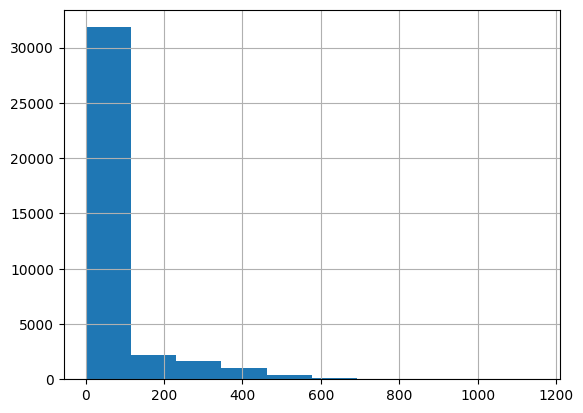

In [6]:
df['wc'].hist()

In [7]:
c = list(more_itertools.flatten([re.findall(r'(\w+)', title) for title in df['title'].tolist()]))
most_frequent_words = Counter(c).most_common(100)
print(most_frequent_words)

[('de', 215986), ('la', 94082), ('du', 90244), ('l', 66073), ('des', 65351), ('2024', 58818), ('et', 54534), ('à', 49179), ('d', 49122), ('le', 36520), ('portant', 30409), ('Arrêté', 29379), ('en', 20877), ('2023', 20297), ('n', 18467), ('les', 18287), ('au', 18093), ('pour', 16458), ('sur', 14148), ('arrêté', 13983), ('un', 13385), ('01', 12321), ('02', 12269), ('préfectoral', 11604), ('dans', 11585), ('par', 11464), ('signature', 11189), ('03', 10179), ('Vu', 9274), ('1', 8978), ('Préfecture', 8949), ('aux', 8618), ('délégation', 8182), ('Direction', 8101), ('autorisation', 8073), ('12', 8001), ('commune', 7559), ('départementale', 7518), ('4', 7231), ('L', 7227), ('DE', 7001), ('2', 6748), ('VU', 6620), ('une', 6371), ('janvier', 6326), ('mars', 5909), ('13', 5696), ('est', 5674), ('M', 5609), ('février', 5404), ('04', 5349), ('sous', 5075), ('26', 4923), ('22', 4863), ('article', 4808), ('24', 4786), ('vidéoprotection', 4754), ('préfet', 4736), ('AP', 4730), ('code', 4713), ('systè

# Clusteurs Viz

In [11]:
import plotly.express as px
df = pd.read_parquet(os.path.join(PATH_PRIMARY, 'juritrack_target.parquet'))

In [12]:
tsne = TSNE(n_components=2, random_state=0)
X = np.array([x.tolist() for x in df['embeddings_ordalie'].tolist()])
X_tsne = tsne.fit_transform(X)

In [13]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=df['target'])
fig.update_layout(
    title="",
    xaxis_title="",
    yaxis_title="",
)
fig.show()